In [4]:
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
%matplotlib inline

In [6]:
original_df = pd.read_excel('/home/quark/Documents/projects/TFM/Databases/data.xlsx')
original_df.sort_values(['Timestamp'], ascending=True, inplace=True)
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'], unit='s')

ravn_df = original_df[original_df['SiteId'] == 1][['Timestamp', 'TotalEntries']]
ravn_df.set_index('Timestamp', inplace=True)
ravn_df.sort_index(inplace=True)

marag_df = original_df[original_df['SiteId'] == 2][['Timestamp', 'TotalEntries', 'TotalEntriesMen', 'TotalEntriesWoman']]
marag_df.set_index('Timestamp', inplace=True)
marag_df.sort_index(inplace=True)
marag_df = marag_df['2017-01-09 00:00:00':]
#Since from this date the time series is constinuous, we slice our dataframe consequently

jaume_df = original_df[original_df['SiteId'] == 3][['Timestamp', 'TotalEntries']]
jaume_df.set_index('Timestamp', inplace=True)
jaume_df.sort_index(inplace=True)

    For the first methods to be tried, we will just use the maragall data since it's the most extensive one and will serve the purpose of exploring different methods without the problem of not having enough data.

In [7]:
standard_df = marag_df.drop(['TotalEntriesMen', 'TotalEntriesWoman'], axis=1).copy()

# Autoregression

In [8]:
standard_df.columns

Index(['TotalEntries'], dtype='object')

### Total Entries

In [9]:
for i in range(1, 49):
    standard_df['t-' + str(i)] = standard_df['TotalEntries'].shift(i)
    
standard_df = standard_df.iloc[49:]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(standard_df.drop('TotalEntries', axis = 1), standard_df['TotalEntries'], test_size = 0.2, random_state = 42, shuffle=False)

In [11]:
X_test.shape

(7450, 48)

In [12]:
X_test.head()

,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,...,t-39,t-40,t-41,t-42,t-43,t-44,t-45,t-46,t-47,t-48
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-09-22 19:00:00,177.0,197.0,180.0,216.0,166.0,213.0,177.0,200.0,204.0,223.0,...,112.0,93.0,117.0,128.0,141.0,237.0,281.0,311.0,312.0,332.0
2018-09-22 19:30:00,180.0,177.0,197.0,180.0,216.0,166.0,213.0,177.0,200.0,204.0,...,24.0,112.0,93.0,117.0,128.0,141.0,237.0,281.0,311.0,312.0
2018-09-22 20:00:00,167.0,180.0,177.0,197.0,180.0,216.0,166.0,213.0,177.0,200.0,...,0.0,24.0,112.0,93.0,117.0,128.0,141.0,237.0,281.0,311.0
2018-09-22 20:30:00,176.0,167.0,180.0,177.0,197.0,180.0,216.0,166.0,213.0,177.0,...,0.0,0.0,24.0,112.0,93.0,117.0,128.0,141.0,237.0,281.0
2018-09-22 21:00:00,169.0,176.0,167.0,180.0,177.0,197.0,180.0,216.0,166.0,213.0,...,0.0,0.0,0.0,24.0,112.0,93.0,117.0,128.0,141.0,237.0


In [13]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(X_train, y_train)
y_hat = lr_model.predict(X_test)

In [14]:
np.sqrt(mean_squared_error(y_test, y_hat))

33.34050681384223

In [18]:
type(y_test)

pandas.core.series.Series

In [19]:
type(y_hat)

numpy.ndarray

In [21]:
type(y_hat[0])

numpy.float64

In [17]:
y_hat[:10]

array([213.28380481, 190.65540607, 192.68372323, 156.06653896,
       163.79256423, 181.09795403, 153.45759051, 105.77524656,
        90.44467028,  90.54509165])

In [16]:
y_test[:10]

Timestamp
2018-09-22 19:00:00    180
2018-09-22 19:30:00    167
2018-09-22 20:00:00    176
2018-09-22 20:30:00    169
2018-09-22 21:00:00    192
2018-09-22 21:30:00    158
2018-09-22 22:00:00    110
2018-09-22 22:30:00    124
2018-09-22 23:00:00    108
2018-09-22 23:30:00     30
Name: TotalEntries, dtype: int64

In [15]:
r2_score(y_test, y_hat)

0.9218891235713758

In [12]:
r2_adjusted_test = 1 - (1-r2_score(y_test, y_hat))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [13]:
r2_adjusted_test

0.9213825268859854

In [14]:
y_hat_all = pd.DataFrame(y_hat).set_index(y_test.index)

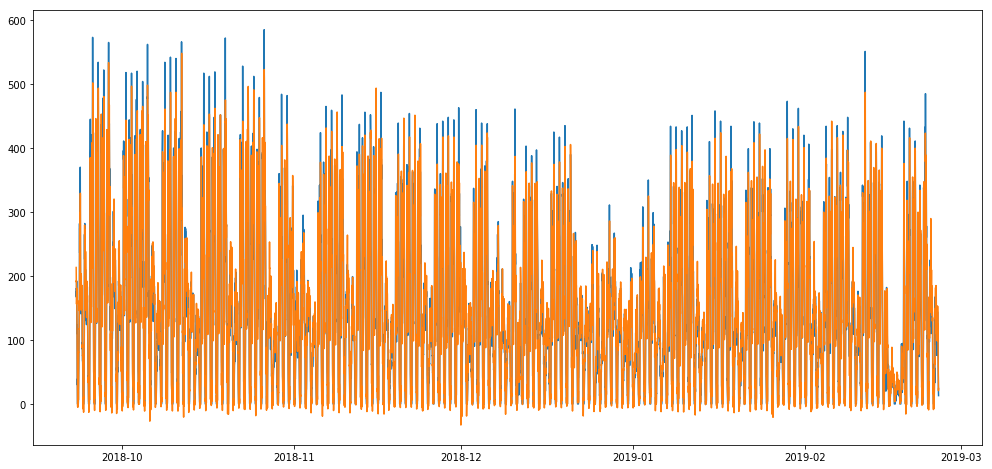

In [15]:
plt.figure(figsize=(17, 8))
plt.plot(y_test)
plt.plot(y_hat_all)
#plt.figure(figsize=(17, 8))
#plt.plot(X_test.index, y_hat)
#plt.figure(figsize=(17,8))

### Women entries

In [16]:
women_df = marag_df.drop(['TotalEntries', 'TotalEntriesMen'], axis=1).copy()
#women_df = original_df[original_df['SiteId'] == 2][['Timestamp', 'TotalEntriesWoman']]
#women_df.set_index('Timestamp', inplace=True)
#women_df.sort_index(inplace=True)
for i in range(1, 49):
    women_df['t-' + str(i)] = women_df['TotalEntriesWoman'].shift(i)

    
women_df = women_df.iloc[49:]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(women_df.drop('TotalEntriesWoman', axis = 1), women_df['TotalEntriesWoman'], test_size = 0.2, random_state = 42, shuffle=False)
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(X_train, y_train)
y_hat = lr_model.predict(X_test)

In [18]:
np.sqrt(mean_squared_error(y_test, y_hat))

19.578935732720655

In [19]:
X_test.shape

(7450, 48)

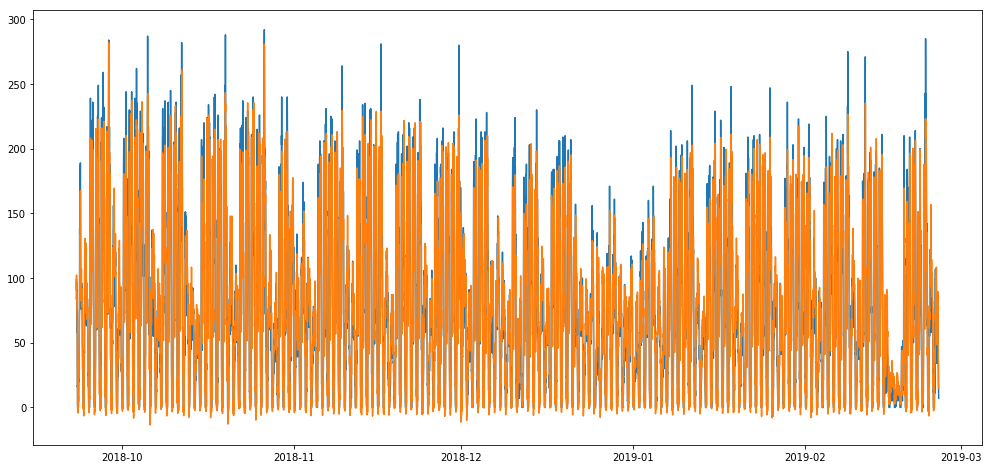

In [20]:
y_hat_w = pd.DataFrame(y_hat).set_index(y_test.index)
plt.figure(figsize=(17, 8))
plt.plot(y_test)
plt.plot(y_hat_w)

### Men entries

In [21]:
men_df = marag_df.drop(['TotalEntries', 'TotalEntriesWoman'], axis=1).copy()
#men_df = original_df[original_df['SiteId'] == 2][['Timestamp', 'TotalEntriesMen']]
#men_df.set_index('Timestamp', inplace=True)
#men_df.sort_index(inplace=True)
for i in range(1, 49):
    men_df['t-' + str(i)] = men_df['TotalEntriesMen'].shift(i)

    
men_df = men_df.iloc[49:]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(men_df.drop('TotalEntriesMen', axis = 1), men_df['TotalEntriesMen'], test_size = 0.2, random_state = 42, shuffle=False)
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(X_train, y_train)
y_hat = lr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_hat))

18.082057340129744

In [23]:
X_test.shape

(7450, 48)

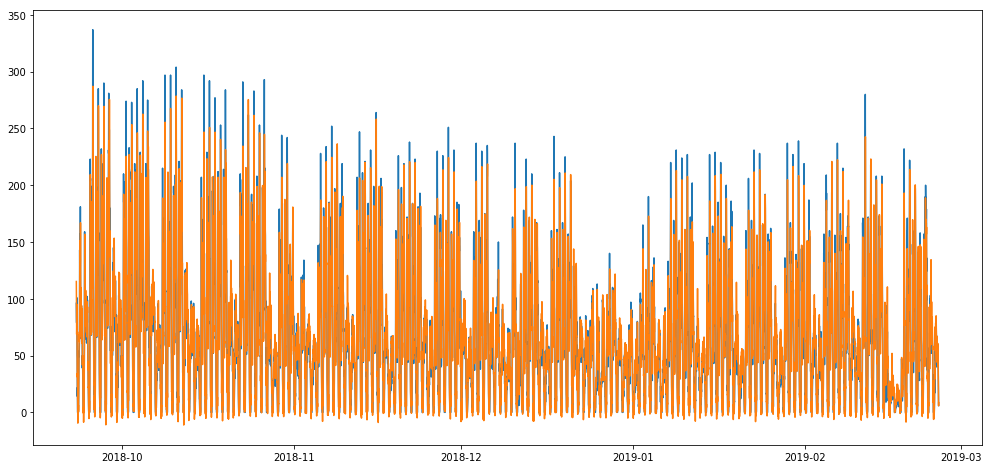

In [24]:
y_hat_m = pd.DataFrame(y_hat).set_index(y_test.index)
plt.figure(figsize=(17, 8))
plt.plot(y_test)
plt.plot(y_hat_m)

In [25]:
(y_hat_all - (y_hat_m + y_hat_w)).sum()

0   -194.431721
dtype: float64

In [26]:
(y_hat_all - (y_hat_m + y_hat_w)).mean()

0   -0.026098
dtype: float64

# We'll just predict the total entries for the rest of the models, then introduce predictions by sex

### Recurrent predictions

TRY TO REWRITE ALL THE CODE BELOW

In [27]:
standard_df = marag_df.drop(['TotalEntriesMen', 'TotalEntriesWoman'], axis=1).copy()
for i in range(1, 49):
    standard_df['t-' + str(i)] = standard_df['TotalEntries'].shift(i)
    
standard_df = standard_df.iloc[49:]
X_train, X_test, y_train, y_test = train_test_split(standard_df.drop('TotalEntries', axis = 1), standard_df['TotalEntries'], test_size = 0.2, random_state = 42, shuffle=False)

In [28]:
lr_model.predict()

TypeError: predict() missing 1 required positional argument: 'X'

In [ ]:
# CHANGE THE CODE!!
def recurrent_prediction(y_train, n_steps, reg):
    x_dev = list(y_train[-1:-(n_steps +1):-1])
    y_dev_hat = []
    for i in range(n_steps):
        y_hat = reg.predict([x_dev])[0]
        y_dev_hat.append(y_hat)
        x_dev.pop(-1)
        x_dev = [y_hat] + x_dev
    return y_dev_hat

y_test_hat = recurrent_prediction(y_train, 48, lr_model)
np.sqrt(mean_squared_error(y_test[:48], y_test_hat))

##### Walk-forward validation

In [165]:
standard_df['TotalEntries'][:int(0.6*len(standard_df['TotalEntries']))].shape

(22318,)

In [174]:
#First we need to split the raw data

def X_data_walk_forward(X_data):
    cut1 = int(0.6*len(X_data))
    X_train_raw = X_data[:cut1]
    return X_train_raw

In [175]:
###Note: it's recommended to use TimSeries Split, but for the time being we'll use train_test_split

#Initial data preparation:
def train_dev_test_split(X_data, y_data):
    
##CODE IMPROVEMENT: raise error if X and y of different size!    
    cut1 = int(0.6*len(X_data))
    cut2 = (len(X_data)-cut_num)//2
    X_train = X_data[:cut1]
    X_dev = X_data[cut1:cut2]
    X_test = X_data[cut2:]
    y_train = y_data[:cut1]
    y_dev = y_data[cut1:cut2]
    y_test = y_data[cut2:]
    
    return X_train, X_dev, X_test, y_train, y_dev, y_test
    
#X_train, X_temp, y_train, y_temp = train_test_split(men_df.drop('TotalEntriesMen', axis = 1), men_df['TotalEntriesMen'], test_size = 0.4, random_state = 42, shuffle=False)
X_train, X_dev, X_test, y_train, y_dev, y_test = train_dev_test_split(X_data, y_data)


NameError: name 'X_data' is not defined

In [ ]:
#Data transformation
#define method to transform data, for example, create lags:
def create_lags(dataframe, N):
    temp_df = dataframe.copy()
    for i in range(len(N)):
        temp_df['t-' + str(i)] = temp_df['TotalEntries'].shift(i)

In [ ]:
#Walk-forward validation

#Define model to be used
model = LinearRegression().fit(X_train, y_train)


def walk_forward_validation(X_train, y_train, L, model):

'''This function integrates a walk-forward validation method for multiple models.

Parameters: model, #lags, train data, test data, length of test_data

'''
    X_grow = X_train.copy()
    y_grow_hat = []
    for i in range(len(X_temp)):
        y_hat = reg.predict(X_temp[i])
        y_grow_hat.append(y_hat)
        y_hat_trans = create_lags(pd.DataFrame(y_hat), 49)
        X_grow = pd.concat(X_grow, y_hat_trans)
        model.fit(X_grow)
    
    



    
    
    
    
    #def recurrent_prediction(y_train, n_steps, reg):
    #x_dev = list(y_train[-1:-(n_steps +1):-1])
    #y_dev_hat = []
    #for i in range(n_steps):
     #   y_hat = reg.predict([x_dev])[0]
     #   y_dev_hat.append(y_hat)
     #   x_dev.pop(-1)
     #   x_dev = [y_hat] + x_dev
    #return y_dev_hat

y_test_hat = recurrent_prediction(y_train, 48, lr_model)
np.sqrt(mean_squared_error(y_test[:48], y_test_hat))

## The prediction has to be appended to the original raw train data:

In [28]:
y_hat

array([115.24226143, 102.87380276,  93.00369053, ...,  25.52591969,
         5.73057463,   8.49695147])

In [111]:
X_test.index[0]

Timestamp('2018-09-23 00:00:00')

In [112]:
y_hat = pd.DataFrame(y_hat, columns=['TotalEntries'])

In [115]:
y_hat['Timestamp'] = str(X_test.index[0])
y_hat.set_index(['Timestamp'], inplace=True)
y_hat

,TotalEntries
Timestamp,
2018-09-23 00:00:00,24.262426


In [172]:
X_train_raw.tail()

Timestamp
2018-04-20 02:00:00    0
2018-04-20 02:30:00    0
2018-04-20 03:00:00    0
2018-04-20 03:30:00    0
2018-04-20 04:00:00    0
Name: TotalEntries, dtype: int64

### K-nearest neighbourhood

In [322]:
from sklearn.neighbors import KNeighborsRegressor

reg_kn = KNeighborsRegressor(n_neighbors=2)#WRITE YOUR CODE
reg_kn.fit(X_train, y_train)
y_dev_hat = recurrent_prediction(y_train, 48, reg_kn)
np.sqrt(mean_squared_error(y_test[:48], y_dev_hat))

53.2884251033937

### Random Forest

In [324]:
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


reg_rf = RandomForestRegressor(random_state=667)
reg_rf.fit(X_train, y_train)
y_dev_hat = recurrent_prediction(y_train, 48, reg_rf)
np.sqrt(mean_squared_error(y_test[:48], y_dev_hat))

53.13960583532149

In [325]:
#WRITE YOUR CODE
performance = pd.DataFrame()

for n_estimators in [2, 5, 7, 10, 20, 100]:
    for max_depth in [5, 7, 10, 20]:
        reg_rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=667)
        reg_rf.fit(X_train, y_train)
        y_dev_hat = recurrent_prediction(y_train, 48, reg_rf)
        
        rmse = np.sqrt(mean_squared_error(y_test[:48], y_dev_hat))
        new_row = pd.DataFrame({
            "n_estimators": [n_estimators],
            "max_depth": [max_depth],
            "rmse": [rmse]
        })
        performance = performance.append(new_row, ignore_index = True)
performance.sort_values("rmse", ascending=False).head()

,n_estimators,max_depth,rmse
11,7,20,44.154660
7,5,20,44.928727
23,100,20,46.135110
19,20,20,48.124800
3,2,20,48.651952


In [330]:
reg_rf = RandomForestRegressor(n_estimators=7,#WRITE YOUR CODE,
                               max_depth=20#WRITE YOUR CODE
                               , random_state=667)
reg_rf.fit(X_train, y_train)
y_test_hat = recurrent_prediction(y_test, 48, reg_rf)
np.sqrt(mean_squared_error(y_test[:48], y_test_hat))

136.7199675083239